Filas: 150, Columnas: 5

VALORES NULOS:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

DATA PREPARATION 

DATOS ESTANDARIZADOS - DIVIDIDOS
Entrenamiento: (120, 4)
Prueba: (30, 4)

MODELADO - ENTRENAMIENTO DE MODELOS

2 MODELOS ENTRENADOS

GRÁFICAS DE FUNCIONAMIENTO DE MODELOS



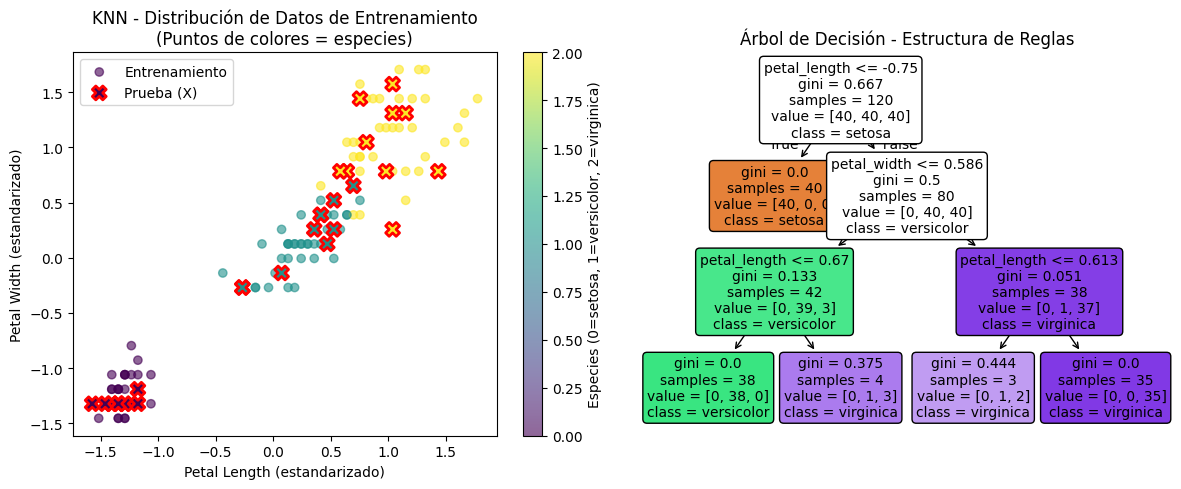

EVALUACIÓN - COMPARACIÓN DE MODELOS



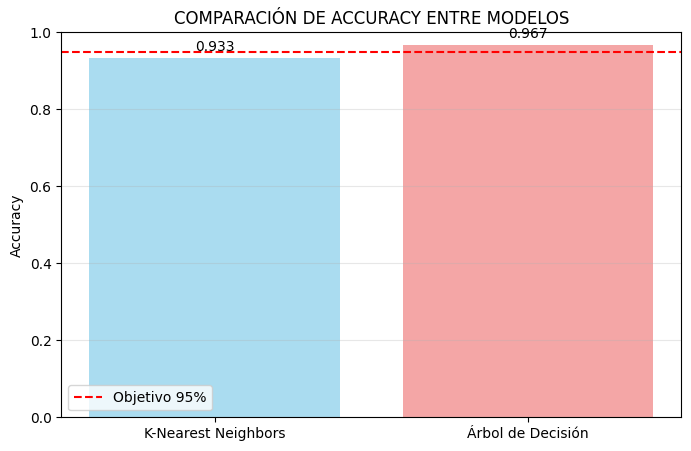

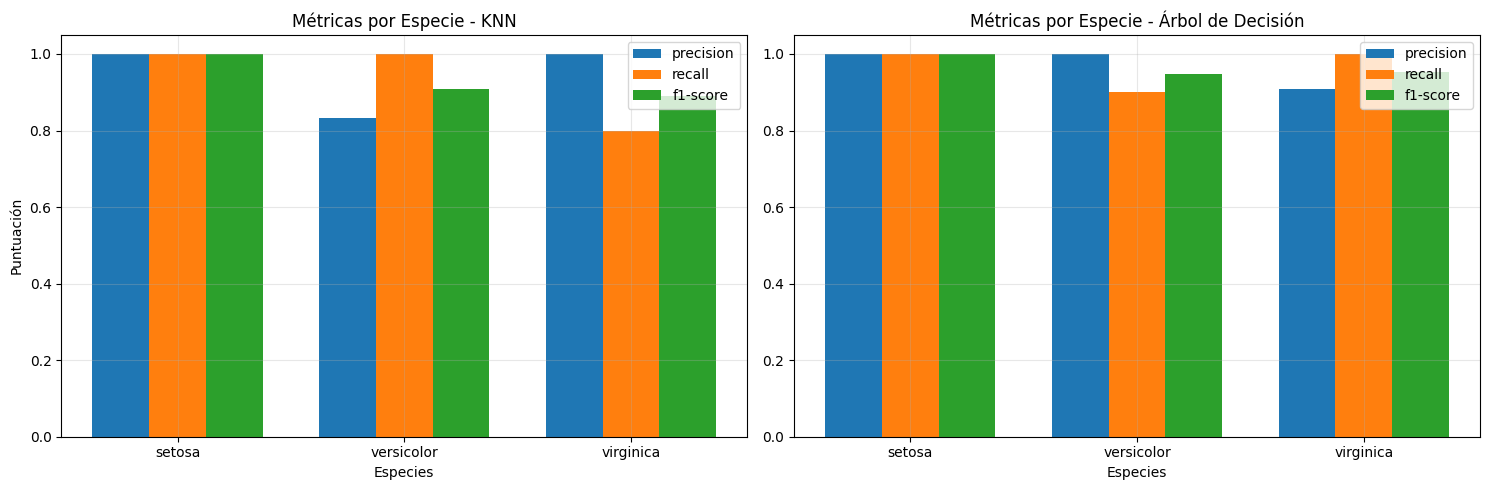

RESULTADOS

K-NEAREST NEIGHBORS:
   Accuracy:  0.9333 (93.33%)
   Precision: 0.9444
   Recall:    0.9333
   F1-Score:  0.9327

ÁRBOL DE DECISIÓN:
   Accuracy:  0.9667 (96.67%)
   Precision: 0.9697
   Recall:    0.9667
   F1-Score:  0.9666

ELECCIÓN DEL MEJOR MODELO

MEJOR MODELO: Árbol de Decisión
Accuracy: 0.9667 (96.67%)
objetivo del 95%: True



In [8]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import plot_tree

# Cargar dataset
df = sns.load_dataset('iris')
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
print()

# Verificar valores nulos
print("VALORES NULOS:")
print(df.isnull().sum())
print()

# DATA PREPARATION
print("DATA PREPARATION ")
print()

# Label Encoding para variable especie
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species_encoded']

# (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("DATOS ESTANDARIZADOS - DIVIDIDOS")
print(f"Entrenamiento: {X_train_scaled.shape}")
print(f"Prueba: {X_test_scaled.shape}")
print()

# MODELADO
print("MODELADO - ENTRENAMIENTO DE MODELOS")
print()

# Modelo 1 K- Más Cercanos
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Modelo 2: Árbol de Decisión
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)

print("2 MODELOS ENTRENADOS")
print()

print("GRÁFICAS DE FUNCIONAMIENTO DE MODELOS")
print()

# GRÁFICA 1: KNN
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_train_scaled[:, 2], X_train_scaled[:, 3], c=y_train, cmap='viridis', alpha=0.6)
plt.xlabel('Petal Length (estandarizado)')
plt.ylabel('Petal Width (estandarizado)')
plt.title('KNN - Distribución de Datos de Entrenamiento\n(Puntos de colores = especies)')
plt.colorbar(scatter, label='Especies (0=setosa, 1=versicolor, 2=virginica)')

plt.scatter(X_test_scaled[:, 2], X_test_scaled[:, 3], c=y_test, cmap='viridis',
            marker='X', s=100, edgecolors='red', linewidth=2)
plt.legend(['Entrenamiento', 'Prueba (X)'])

# GRÁFICA 2: ÁRBOL DE DECISIÓN - ESTRUCTURA
plt.subplot(1, 2, 2)
plot_tree(tree,
          feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
          class_names=le.classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Árbol de Decisión - Estructura de Reglas')

plt.tight_layout()
plt.show()

print("EVALUACIÓN - COMPARACIÓN DE MODELOS")
print()

acc_knn = accuracy_score(y_test, y_pred_knn)
acc_tree = accuracy_score(y_test, y_pred_tree)

# GRÁFICA 3: COMPARACIÓN DE ACCURACY
plt.figure(figsize=(8, 5))
modelos = ['K-Nearest Neighbors', 'Árbol de Decisión']
accuracy_scores = [acc_knn, acc_tree]
colores = ['skyblue', 'lightcoral']

bars = plt.bar(modelos, accuracy_scores, color=colores, alpha=0.7)
plt.axhline(y=0.95, color='red', linestyle='--', label='Objetivo 95%')
plt.ylabel('Accuracy')
plt.title('COMPARACIÓN DE ACCURACY ENTRE MODELOS')
plt.ylim(0, 1.0)

for bar, acc in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.3f}', ha='center', va='bottom')

plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

# GRÁFICA 4: MÉTRICAS POR ESPECIE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Reporte KNN
report_knn = classification_report(y_test, y_pred_knn, target_names=le.classes_, output_dict=True)
metrics_knn = ['precision', 'recall', 'f1-score']
species = le.classes_

for i, metric in enumerate(metrics_knn):
    values = [report_knn[species[j]][metric] for j in range(len(species))]
    ax1.bar(np.arange(len(species)) + i*0.25, values, width=0.25, label=metric)

ax1.set_title('Métricas por Especie - KNN')
ax1.set_xlabel('Especies')
ax1.set_ylabel('Puntuación')
ax1.set_xticks(np.arange(len(species)) + 0.25)
ax1.set_xticklabels(species)
ax1.legend()
ax1.grid(alpha=0.3)

# Reporte Árbol
report_tree = classification_report(y_test, y_pred_tree, target_names=le.classes_, output_dict=True)

for i, metric in enumerate(metrics_knn):
    values = [report_tree[species[j]][metric] for j in range(len(species))]
    ax2.bar(np.arange(len(species)) + i*0.25, values, width=0.25, label=metric)

ax2.set_title('Métricas por Especie - Árbol de Decisión')
ax2.set_xlabel('Especies')
ax2.set_xticks(np.arange(len(species)) + 0.25)
ax2.set_xticklabels(species)
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()


print("RESULTADOS")
print()

print("K-NEAREST NEIGHBORS:")
print(f"   Accuracy:  {acc_knn:.4f} ({acc_knn*100:.2f}%)")
print(f"   Precision: {report_knn['weighted avg']['precision']:.4f}")
print(f"   Recall:    {report_knn['weighted avg']['recall']:.4f}")
print(f"   F1-Score:  {report_knn['weighted avg']['f1-score']:.4f}")
print()

print("ÁRBOL DE DECISIÓN:")
print(f"   Accuracy:  {acc_tree:.4f} ({acc_tree*100:.2f}%)")
print(f"   Precision: {report_tree['weighted avg']['precision']:.4f}")
print(f"   Recall:    {report_tree['weighted avg']['recall']:.4f}")
print(f"   F1-Score:  {report_tree['weighted avg']['f1-score']:.4f}")
print()

print("ELECCIÓN DEL MEJOR MODELO")
print()

if acc_knn > acc_tree:
    mejor_modelo = "K-Nearest Neighbors"
    mejor_accuracy = acc_knn
else:
    mejor_modelo = "Árbol de Decisión"
    mejor_accuracy = acc_tree

print(f"MEJOR MODELO: {mejor_modelo}")
print(f"Accuracy: {mejor_accuracy:.4f} ({mejor_accuracy*100:.2f}%)")
print(f"objetivo del 95%: {mejor_accuracy >= 0.95}")
print()
